In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data= pd.read_csv("../input/bank00/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

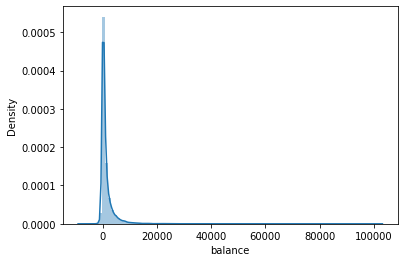

In [2]:
import seaborn as sns

sns.distplot(data.balance, bins=100)

In [3]:
data.loc[data['age']<=20, 'age']=0
data.loc[(data['age']<=40)&(data['age']>20), 'age']=1
data.loc[(data['age']<=60)&(data['age']>40), 'age']=2
data.loc[(data['age']<=80)&(data['age']>60), 'age']=3
data.loc[data['age']>80, 'age']=4

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 더미 변수로 변수 변환

In [5]:
data['y_map']= data['y'].factorize()[0]
data['loan_map']= data['loan'].factorize()[0]
data['housing_map']= data['housing'].factorize()[0]
data['default_map']= data['default'].factorize()[0]
data['education_map']= data['education'].factorize()[0]
data['marital_map']= data['marital'].factorize()[0]
data['job_map']=data['job'].factorize()[0]
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,y_map,loan_map,housing_map,default_map,education_map,marital_map,job_map
0,2,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,0,0,0,0,0,0,0
1,2,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,0,0,0,0,1,1,1
2,1,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,0,1,0,0,1,0,2
3,2,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,0,0,0,0,2,0,3
4,1,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,0,0,1,0,2,1,4


In [6]:
data_cl=data[['age','job_map','marital_map','education_map','default_map','balance','housing_map','loan_map','y_map']]
data_co=data[['day','month','duration','campaign','pdays','previous','poutcome','y']]

data_cl.head()

,age,job_map,marital_map,education_map,default_map,balance,housing_map,loan_map,y_map
0,2,0,0,0,0,2143,0,0,0
1,2,1,1,1,0,29,0,0,0
2,1,2,0,1,0,2,0,1,0
3,2,3,0,2,0,1506,0,0,0
4,1,4,1,2,0,1,1,0,0


In [ ]:
# Convert categorical variables to dummies
data_with_dummies = pd.get_dummies(data=data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
data_with_dummies.head()

In [ ]:
# Scatterplot showing age and balance
data_with_dummies.plot(kind='scatter', x='age', y='balance');

# correlation heatmap

In [ ]:
import seaborn as sns

def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(8,6))
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.1f', square=True);
  
draw_corrmat(data)

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_cl.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# Heatmap
corr = data_with_dummies.corr()
corr

plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [ ]:
data["y_map"] = data['y'].map({'yes':1, 'no':0})

# cramers v

keeping of variables

In [ ]:
data = data[[i for i in data.columns if i not in ('balance','day','duration','campaign', 'pdays', 'previous','contact','month')]]
data.head()


label

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

data_encoded.head()

Building of the Cramer's V function

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))


Building of the matrix

In [ ]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df

heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [ ]:
plt.boxplot(data_cl['balance'], showmeans=True)
plt.show()

# bar chart (범주형- 범주형)

In [ ]:
def bar_chart(feature,data):
    yes = data[data['y']=='yes'][feature].value_counts()
    no = data[data['y']=='no'][feature].value_counts()
    total= yes+no
    df= pd.DataFrame([yes, no,total])
    df.index= ['yes','no','total']
    df.plot(figsize= (10, 6),kind='bar',stacked= True)

In [ ]:
bar_chart('housing',data_cl)

In [ ]:
yes = data[data['housing']=='yes']['education'].value_counts()
no = data[data['housing']=='no']['education'].value_counts()
total= yes+no
df= pd.DataFrame([yes, no,total])
df.index= ['yes','no','total']
df.plot(figsize= (10, 6),kind='bar',stacked= True)
    

In [ ]:
bar_chart('age', data)

In [ ]:
data_cl.corr(method= 'pearson')

In [ ]:
import matplotlib.pyplot as plt

data_cl['job'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('job')
plt.ylabel('count')
plt.title('per job')
plt.show()

# 범주형- 연속형

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
cnt=sns.countplot(y='default',hue='job',data=data_cl,palette='Set3')
cnt.set_xlabel("job")
cnt.set_ylabel("default")

plt.show()

In [ ]:
plt.figure(figsize=(16,8))
box=sns.boxplot(x='job',y='balance',data=data_cl)
box.set_xlabel("job")
box.set_ylabel("balance")
plt.show()

# 연속형- 연속형

In [ ]:
data_co.corr(method= 'pearson')

# 여기부터는 마케팅 및 기타

In [ ]:
import seaborn as sns
import matplotlib as plt

ax = sns.scatterplot(x='pdays' ,
                    y='previous',

                     alpha=0.5,

                     data=data_co)

plt.title('Scatter Plot by seaborn', fontsize=20)

plt.show()


In [ ]:
cut_point = data_co["previous"].quantile(0.99)
data_co_cut=data_co[data_co['previous'] < cut_point]

ax = sns.scatterplot(x='pdays' ,
                    y='previous',

                     alpha=0.5,

                     data=data_co_cut)

plt.title('Scatter Plot by seaborn', fontsize=20)

plt.show()


In [ ]:
bar_chart('poutcome', data)

# 추가적 분석 (age, marketing)

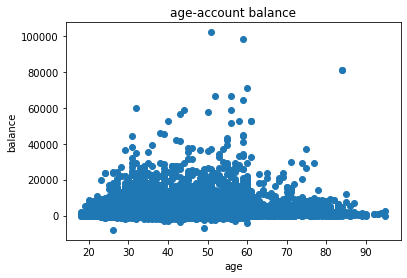

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt




#plot
plt.scatter(data.age, data.balance)
plt.title('age-account balance')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [74]:
#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = data.groupby(['age'])['balance'].mean()
mean_deposit=pd.DataFrame(mean_deposit)
mean_deposit.columns=['mean balance']
mean_deposit['age']=mean_deposit.index



mean_deposit.tail(15)

,mean balance,age
age,,
80,2131.967742,80
81,1325.941176,81
82,1424.631579,82
83,2521.181818,83
84,19511.111111,84
85,4602.800000,85
86,1315.222222,86
87,2399.750000,87
88,540.500000,88


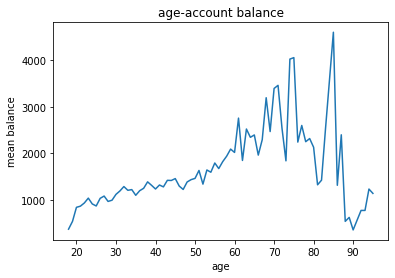

In [76]:
#plot
plt.plot(mean_deposit.index, mean_deposit['mean balance'])
plt.title('age-account balance')
plt.xlabel('age')
plt.ylabel('mean balance')
plt.show()

In [70]:
def find_outlier(data):
    q1, q3= np.percentile(data, [25,75])
    iqr= q3-q1
    lower_bound= q1-(iqr*1.5)
    upper_bound= q3+(iqr*1.5)
    mask= np.where((data>upper_bound) | (data<lower_bound))
    return mask

In [71]:
mask= find_outlier(list(mean_deposit['mean balance']))
mask

(array([56, 57, 66, 67]),)

In [72]:
mean_deposit=mean_deposit.drop(index=[56,57,66,67])
mean_deposit

,mean balance,age
age,,
18,372.416667,18
19,539.771429,19
20,841.940000,20
21,866.759494,21
22,935.604651,22
...,...,...
90,356.500000,90
92,775.000000,92
93,775.000000,93


In [75]:
index=mean_deposit[mean_deposit['age']==84].index
mean_deposit=mean_deposit.drop(index)